In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data/dataset/book1.csv'
data = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataframe to understand its structure
data.head()


,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


The data contains a network data structure with column "Source", "Target", "Type", "Weight", and "Type"

In [5]:
# Create a graph from the dataframe
G = nx.from_pandas_edgelist(data, source='Source', target='Target', edge_attr=True)


In [6]:
# Basic statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()


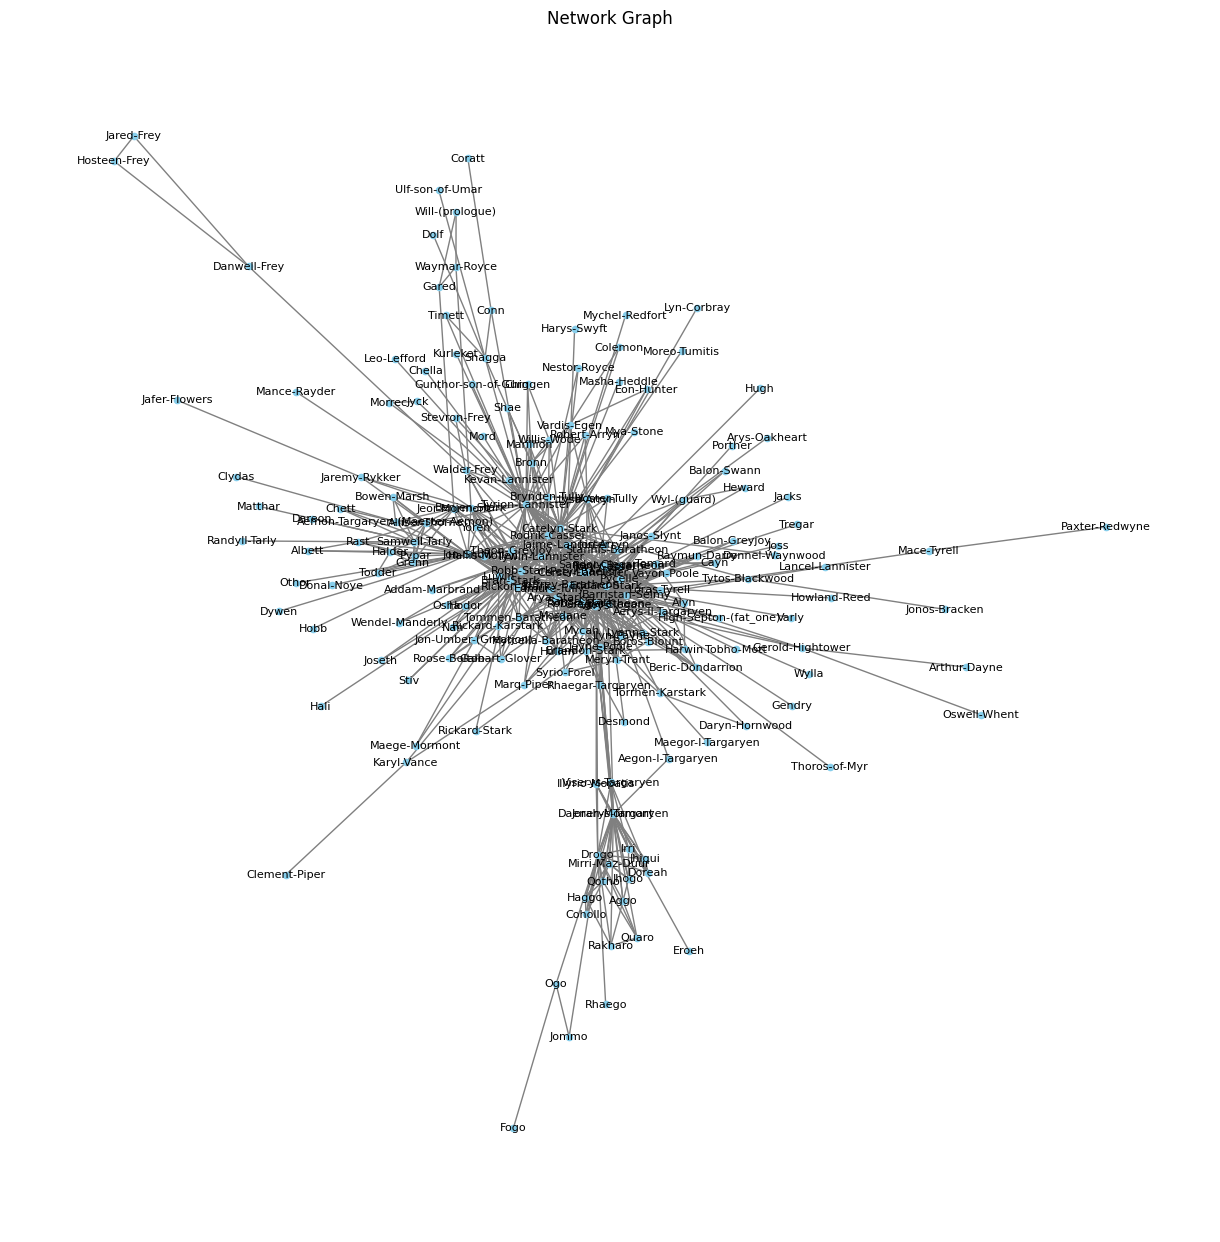

In [7]:
# Drawing the graph (basic visualization)
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=20, font_size=8, node_color='skyblue', edge_color='gray')
plt.title('Network Graph')
plt.show()


In [8]:
# Computing basic network statistics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


In [9]:
# Displaying basic statistics
num_nodes, num_edges, degree_centrality, betweenness_centrality, closeness_centrality


(187,
 684,
 {'Addam-Marbrand': 0.010752688172043012,
  'Jaime-Lannister': 0.15591397849462366,
  'Tywin-Lannister': 0.11827956989247312,
  'Aegon-I-Targaryen': 0.010752688172043012,
  'Daenerys-Targaryen': 0.11290322580645162,
  'Eddard-Stark': 0.3548387096774194,
  'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
  'Alliser-Thorne': 0.05376344086021506,
  'Bowen-Marsh': 0.02688172043010753,
  'Chett': 0.016129032258064516,
  'Clydas': 0.005376344086021506,
  'Jeor-Mormont': 0.06989247311827958,
  'Jon-Snow': 0.19892473118279572,
  'Samwell-Tarly': 0.06451612903225806,
  'Aerys-II-Targaryen': 0.03225806451612903,
  'Brandon-Stark': 0.03225806451612903,
  'Gerold-Hightower': 0.02688172043010753,
  'Jon-Arryn': 0.08064516129032259,
  'Robert-Baratheon': 0.2688172043010753,
  'Aggo': 0.03225806451612903,
  'Drogo': 0.10215053763440861,
  'Jhogo': 0.03225806451612903,
  'Jorah-Mormont': 0.06989247311827958,
  'Quaro': 0.02688172043010753,
  'Rakharo': 0.02688172043010753,
  'Albett

In [11]:
# After built the Network graph we can store the model

import pickle

# Define the path for the pickle file
pickle_path = 'data/model/game_of_thrones_network.pkl'

# Save the graph using pickle
with open(pickle_path, 'wb') as file:
    pickle.dump(G, file)

pickle_path

'data/model/game_of_thrones_network.pkl'

Data Exploration and Visualization

In [13]:
# Filter the data for book 1 and book 5
data_book1 = data[data['book'] == 1]
data_book5 = data[data['book'] == 5]


In [ ]:
# Create graphs for book 1 and book 5
G_book1 = nx.from_pandas_edgelist(data_book1, source='Source', target='Target', edge_attr=True)
G_book5 = nx.from_pandas_edgelist(data_book5, source='Source', target='Target', edge_attr=True)

# Find the path between Jon and Daenerys in book 1 and book 5
# Note: If there is no direct path, NetworkX will raise an exception, which we will catch.

try:
    path_jon_daenerys_book1 = nx.shortest_path(G_book1, source='Jon-Snow', target='Daenerys-Targaryen')
except nx.NetworkXNoPath:
    path_jon_daenerys_book1 = "No path found"

try:
    path_jon_daenerys_book5 = nx.shortest_path(G_book5, source='Jon-Snow', target='Daenerys-Targaryen')
except nx.NetworkXNoPath:
    path_jon_daenerys_book5 = "No path found"

path_jon_daenerys_book1, path_jon_daenerys_book5


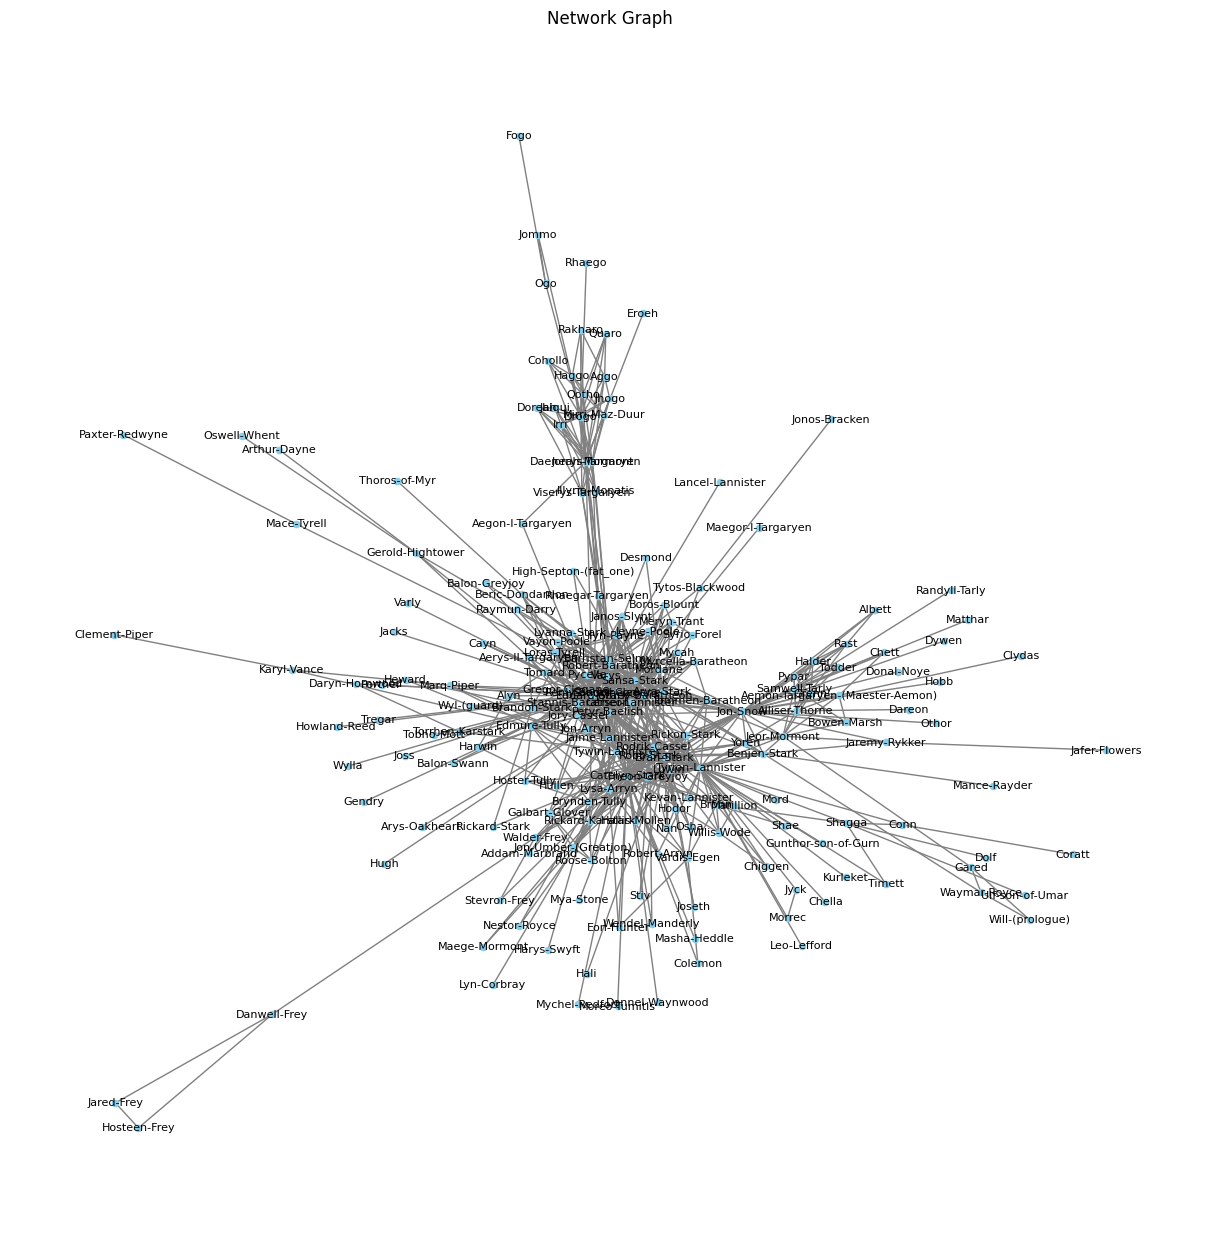

In [14]:
# Drawing the graph (basic visualization)
plt.figure(figsize=(12, 12))
nx.draw(G_book1, with_labels=True, node_size=20, font_size=8, node_color='skyblue', edge_color='gray')
plt.title('Network Graph')
plt.show()

Find the path between Jon and Daenerys in book 1

In [21]:
path_jon_daenerys_book1 = nx.shortest_path(G_book1, source='Jon-Snow', target='Daenerys-Targaryen')

In [22]:
path_jon_daenerys_book1

['Jon-Snow', 'Eddard-Stark', 'Daenerys-Targaryen']

Find the path between Jon and Daenerys in book 5

In [23]:
path_jon_daenerys_book5 = nx.shortest_path(G_book5, source='Jon-Snow', target='Daenerys-Targaryen')

NodeNotFound: Either source Jon-Snow or target Daenerys-Targaryen is not in G